# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,\n\n\n\n\n\n\n\nAli Wong: Baby Cobra (2016) |...,Ali Wong
amy,\n\n\n\n\n\n\n\nAmy Schumer: Emergency Contac...,Amy Schumer
andrew,\n\n\n\n\n\n\n\nAndrew Santino: Home Field Ad...,Andrew Santino
anthony,\n\n\n\n\n\n\n\nAnthony Jeselnik: Thoughts An...,Anthony Jeselnik
bill,\n\n\n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL...,Bill Burr
bo,\n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...,Bo Burnham
chris,\n\n\n\n\n\n\n\nChris Rock: Tamborine (2018) ...,Chris Rock
dave,\n\n\n\n\n\n\n\nDave Chappelle: The Age of Sp...,Dave Chappelle
ellen,\n\n\n\n\n\n\n\nEllen DeGeneres: For Your App...,Ellen DeGeneres
hasan,\n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...,Hasan Minhaj


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,\n\n\n\n\n\n\n\nAli Wong: Baby Cobra (2016) |...,Ali Wong,0.073649,0.484622
amy,\n\n\n\n\n\n\n\nAmy Schumer: Emergency Contac...,Amy Schumer,0.125855,0.521537
andrew,\n\n\n\n\n\n\n\nAndrew Santino: Home Field Ad...,Andrew Santino,0.067626,0.532013
anthony,\n\n\n\n\n\n\n\nAnthony Jeselnik: Thoughts An...,Anthony Jeselnik,0.065522,0.555663
bill,\n\n\n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL...,Bill Burr,0.019287,0.538025
bo,\n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...,Bo Burnham,0.562500,0.350000
chris,\n\n\n\n\n\n\n\nChris Rock: Tamborine (2018) ...,Chris Rock,0.025694,0.546962
dave,\n\n\n\n\n\n\n\nDave Chappelle: The Age of Sp...,Dave Chappelle,0.003528,0.513124
ellen,\n\n\n\n\n\n\n\nEllen DeGeneres: For Your App...,Ellen DeGeneres,0.138680,0.556903
hasan,\n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...,Hasan Minhaj,0.562500,0.350000


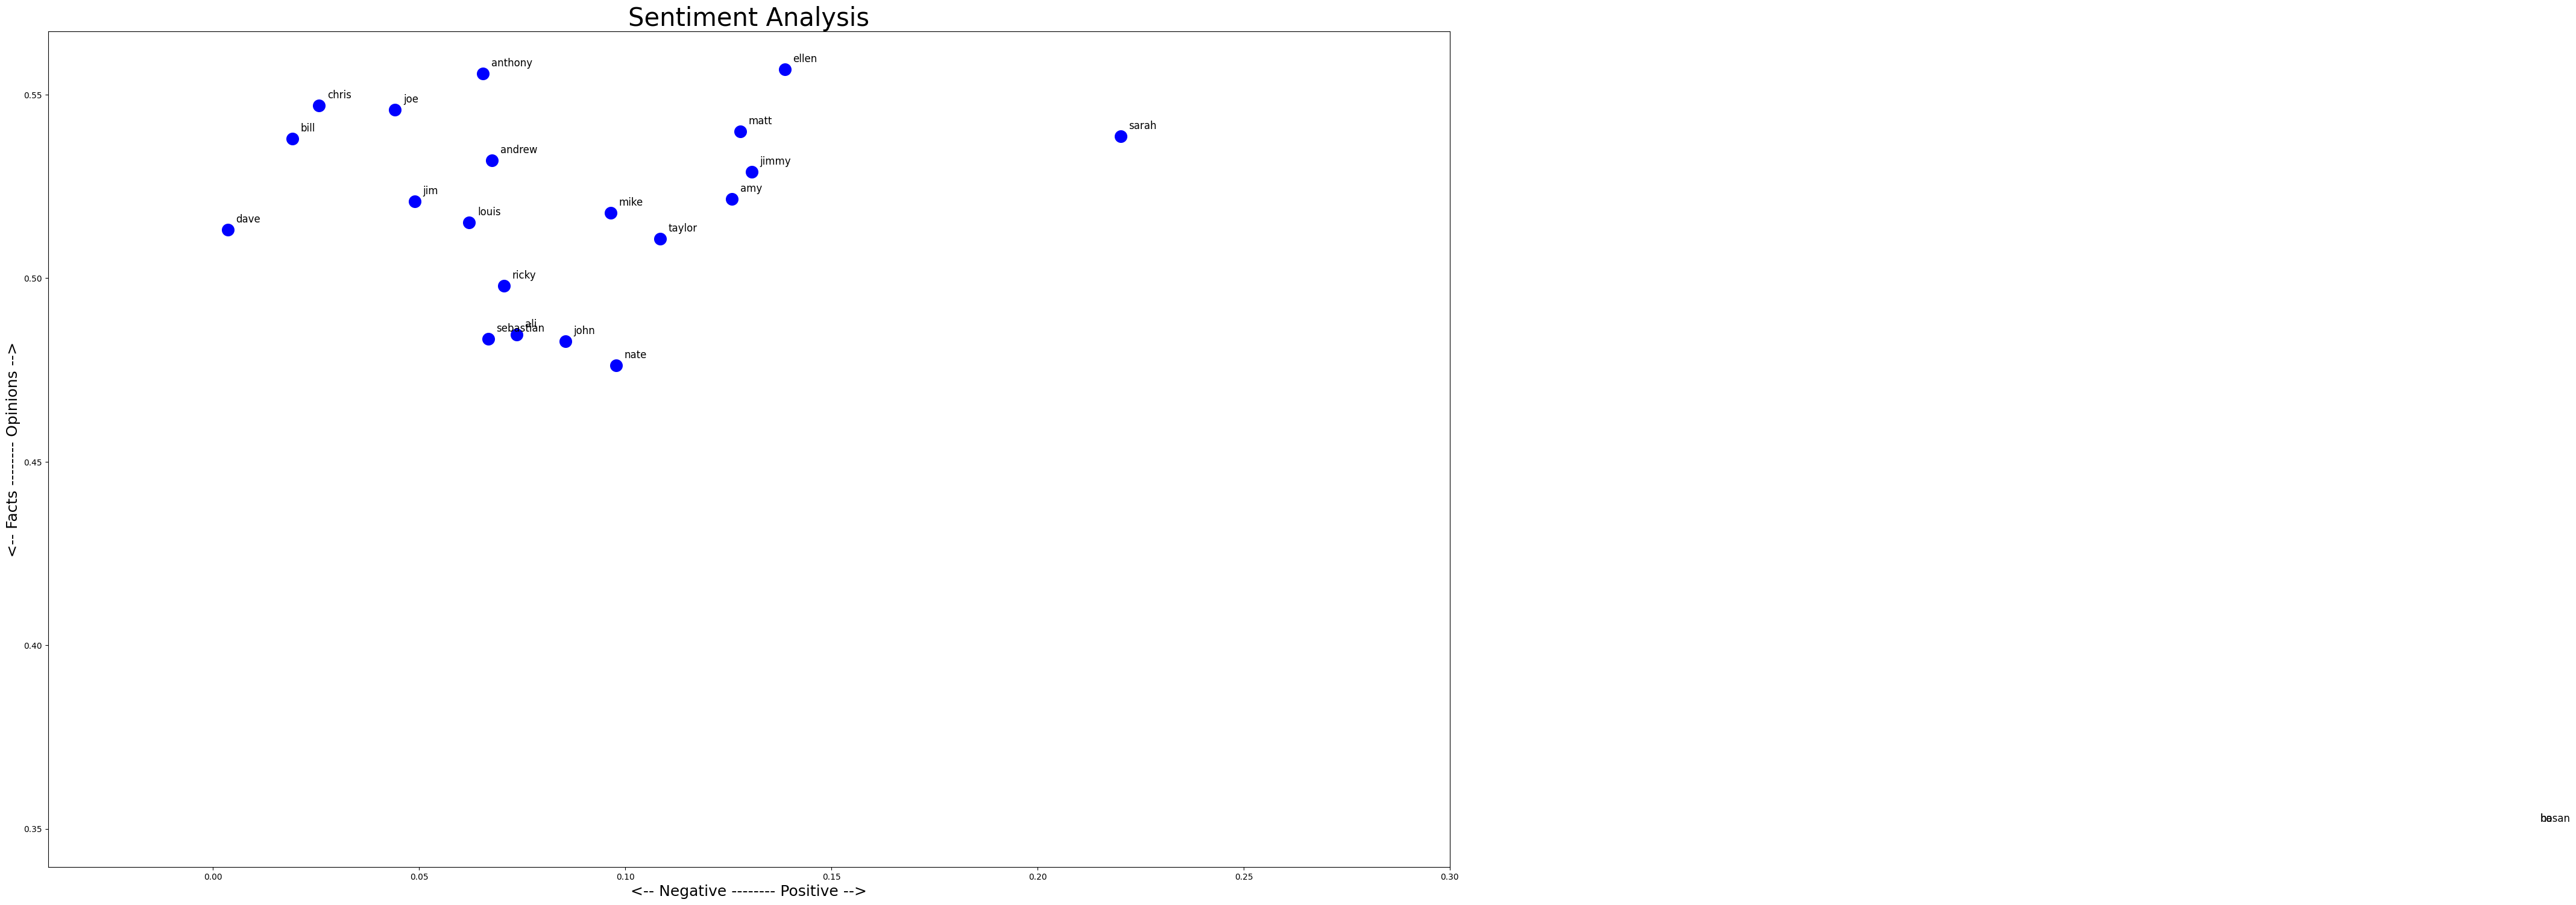

In [20]:
import matplotlib.pyplot as plt

# Increase figure size
plt.rcParams['figure.figsize'] = [30, 18]  # Larger figure size

for comedian in data.index:
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue', s=200)  # Increase scatter point size
    plt.text(x + 0.002, y + 0.002, comedian, fontsize=12)  # Increase font size and add more spacing
    plt.xlim(-0.04, 0.30)

# Adjust title and axis labels
plt.title('Sentiment Analysis', fontsize=30)  # Larger title font size
plt.xlabel('<-- Negative -------- Positive -->', fontsize=18)  # Larger label font size
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=18)  # Larger label font size

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [5]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,\n\n\n\n\n\n\n\nAli Wong: Baby Cobra (2016) |...,Ali Wong,0.073649,0.484622
amy,\n\n\n\n\n\n\n\nAmy Schumer: Emergency Contac...,Amy Schumer,0.125855,0.521537
andrew,\n\n\n\n\n\n\n\nAndrew Santino: Home Field Ad...,Andrew Santino,0.067626,0.532013
anthony,\n\n\n\n\n\n\n\nAnthony Jeselnik: Thoughts An...,Anthony Jeselnik,0.065522,0.555663
bill,\n\n\n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL...,Bill Burr,0.019287,0.538025
bo,\n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...,Bo Burnham,0.562500,0.350000
chris,\n\n\n\n\n\n\n\nChris Rock: Tamborine (2018) ...,Chris Rock,0.025694,0.546962
dave,\n\n\n\n\n\n\n\nDave Chappelle: The Age of Sp...,Dave Chappelle,0.003528,0.513124
ellen,\n\n\n\n\n\n\n\nEllen DeGeneres: For Your App...,Ellen DeGeneres,0.138680,0.556903
hasan,\n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...,Hasan Minhaj,0.562500,0.350000


In [8]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[" \n\n\n\n\n\n\n\nAli Wong: Baby Cobra (2016) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\tSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\nOPINIONS\n \n\n \n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\nOPINIONS\n \n\n\n\n\n\n\n\nSearch\n\n Search\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nAli Wong: Baby Cobra (2016) | Transcript \n

In [9]:
# The list has 10 elements, one for each transcript
len(list_pieces)

22

In [10]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [11]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.12621267150928167,
  0.024098356009070294,
  0.10666295754323923,
  0.0866715429109497,
  -0.028430913348946138,
  0.15224366003470322,
  0.016230799536720585,
  0.11705981775426216,
  -0.0057330747955747835,
  0.15314360119047615],
 [0.29865117338801545,
  0.19699609733700643,
  -0.0012403993855606807,
  0.07665884021816224,
  0.1030499014874015,
  0.07326961233211235,
  0.08375274725274724,
  0.19429834054834053,
  0.09992769706752759,
  0.20263850732600733],
 [0.16588992604617606,
  -0.005152658122955154,
  0.15357078894312934,
  0.019006758547574873,
  0.1345014880952381,
  0.05135056301722967,
  -0.03095238095238092,
  0.044234641387419164,
  -0.0030930129060969883,
  0.13935333618927365],
 [0.16441445062873636,
  -0.03857869104579631,
  -0.04726972948803938,
  0.03733672936259143,
  0.09337880686564896,
  0.17912151067323479,
  0.06152423469387754,
  -0.0729108309990663,
  0.12165113605791575,
  0.18590680861089018],
 [-0.010431629607765976,
  -0.0051508877595834324,
  0.0195

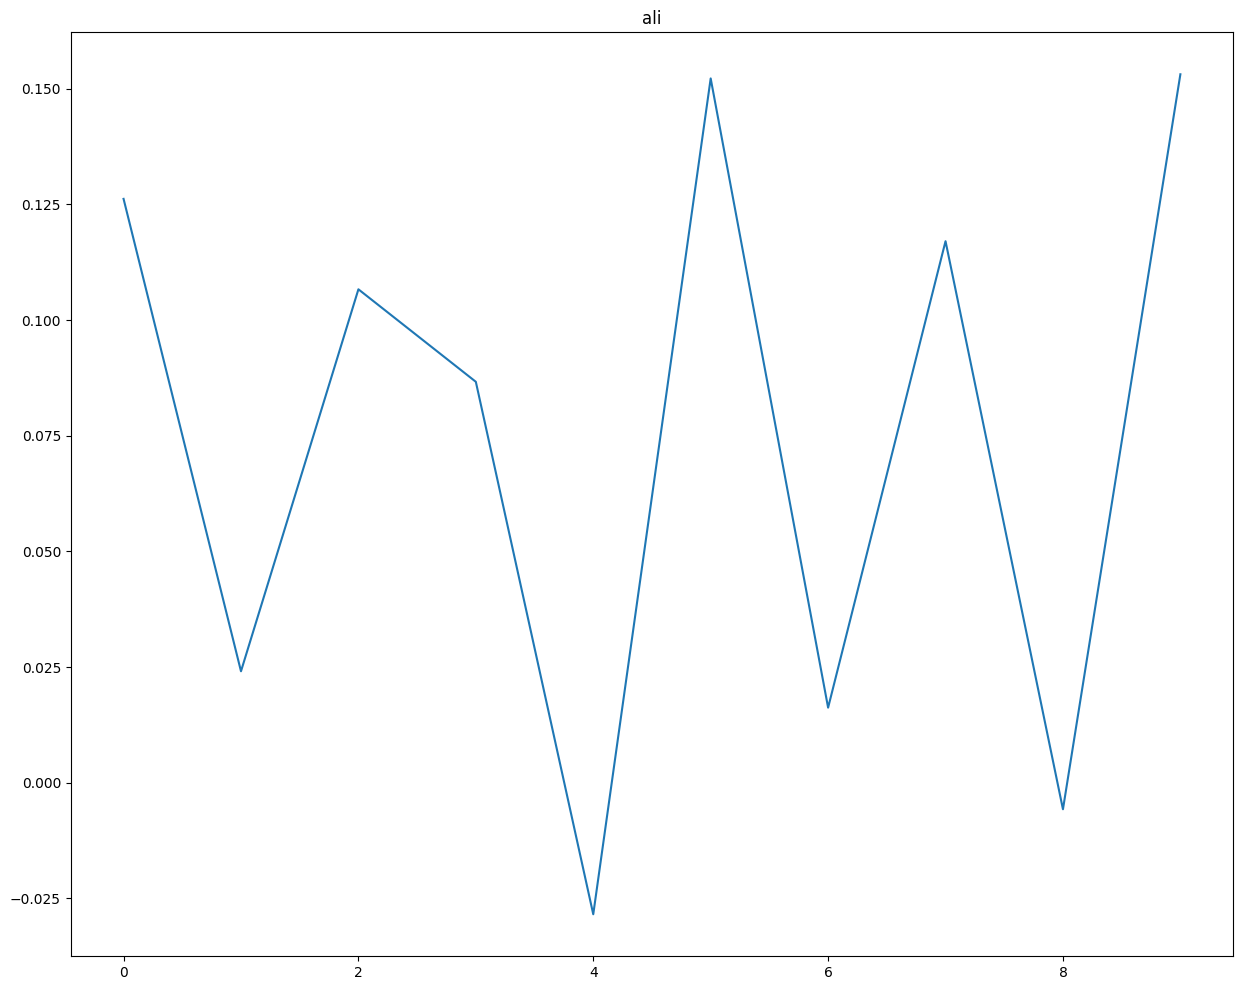

In [12]:
# Show the plot for one comedian
comedian_name = data.index[0]  # Get the name of the first comedian from the index
plt.plot(polarity_transcript[0])  # Assuming polarity_transcript contains the data for each comedian
plt.title(comedian_name)  # Set the title as the comedian's name
plt.show()


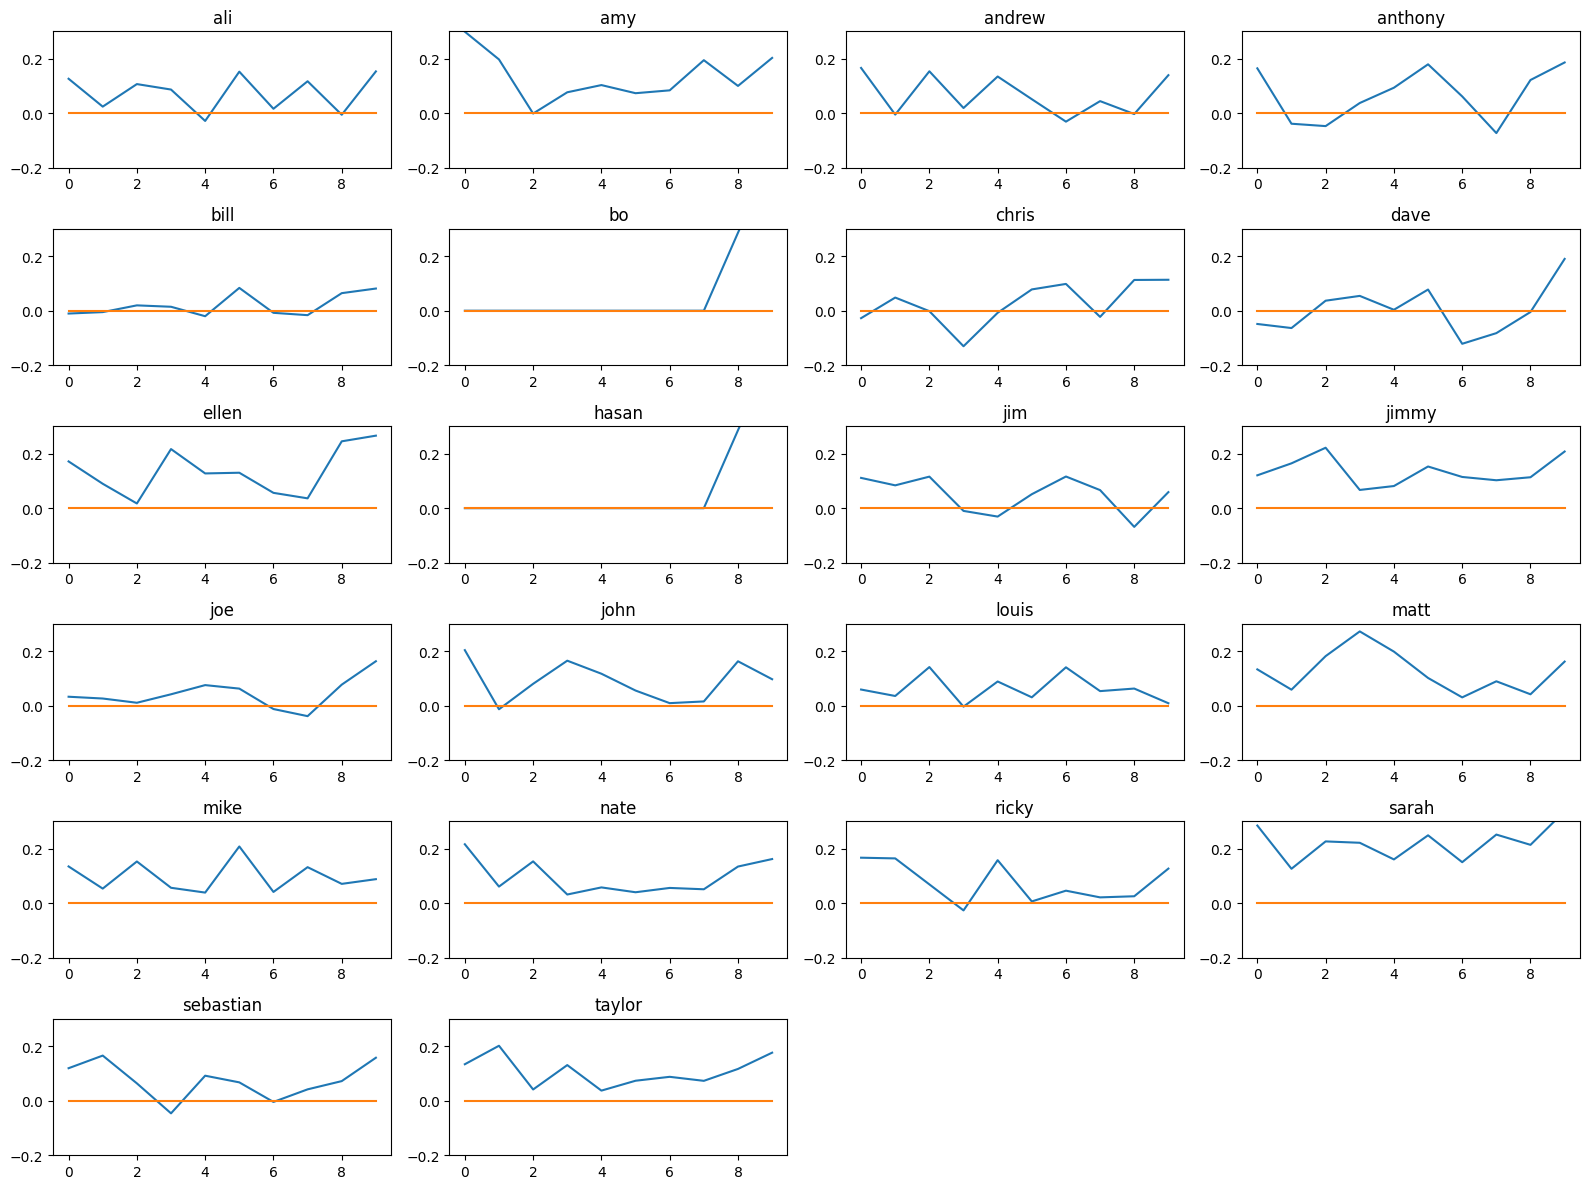

In [13]:
import matplotlib.pyplot as plt 

# Calculate the number of rows needed
num_comedians = len(data.index)
num_cols = 4
num_rows = math.ceil(num_comedians / num_cols)

plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(num_rows, num_cols, index + 1)  # Adjust rows dynamically
    plt.plot(polarity_transcript[index])  # Plot the polarity transcript for the comedian
    plt.plot(np.arange(0, 10), np.zeros(10))  # Add a zero baseline
    plt.title(comedian)  # Use the comedian's name from the index
    plt.ylim(ymin=-0.2, ymax=0.3)  # Set y-axis limits

plt.tight_layout()  # Adjust subplot spacing
plt.show()



Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.

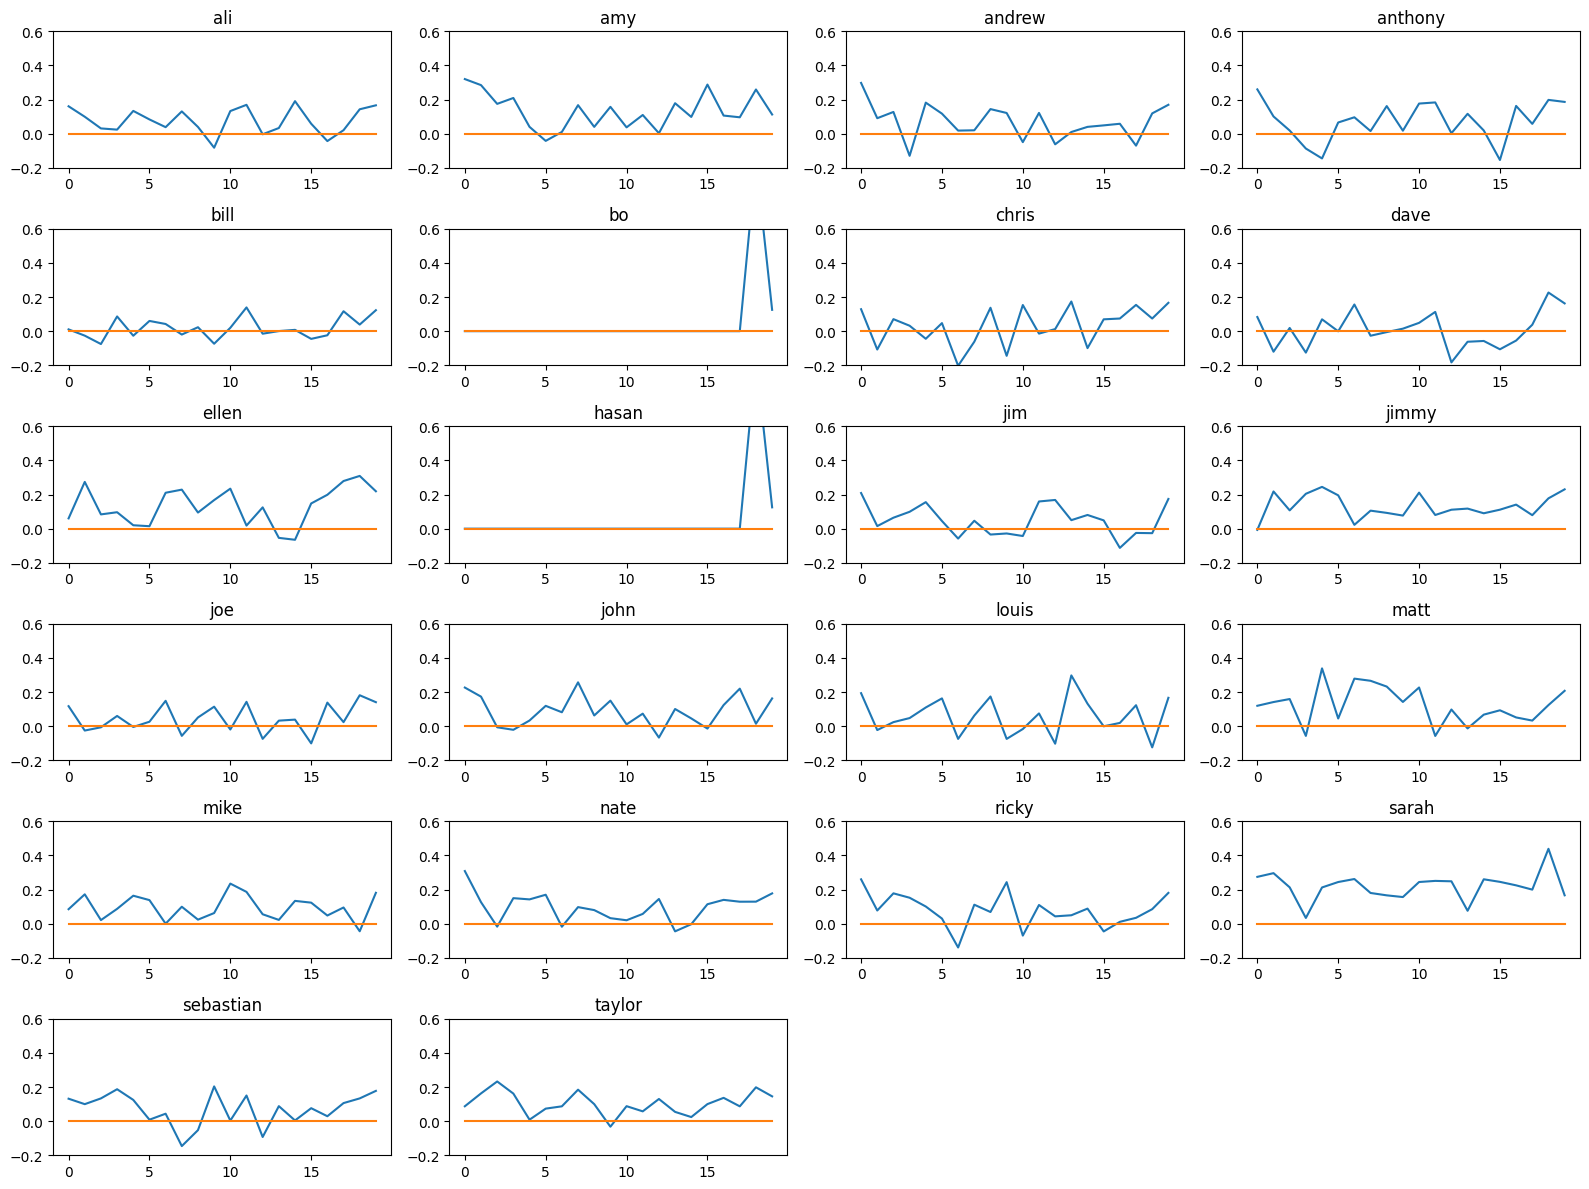

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

# Define the number of sections
num_sections = 20  

# Recalculate polarity transcript
polarity_transcript = []
for transcript in data['transcript']:
    length = len(transcript)
    section_length = length // num_sections
    polarities = []
    
    for i in range(num_sections):
        start = i * section_length
        end = start + section_length
        section = transcript[start:end]
        polarities.append(TextBlob(section).sentiment.polarity)
    
    polarity_transcript.append(polarities)

# Determine the number of rows and columns for subplots
num_comedians = len(data.index)
cols = 4  # Fixed number of columns
rows = math.ceil(num_comedians / cols)

# Plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(rows, cols, index + 1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, num_sections), np.zeros(num_sections))
    plt.title(comedian)
    plt.ylim(ymin=-0.2, ymax=0.6)

plt.tight_layout()
plt.show()



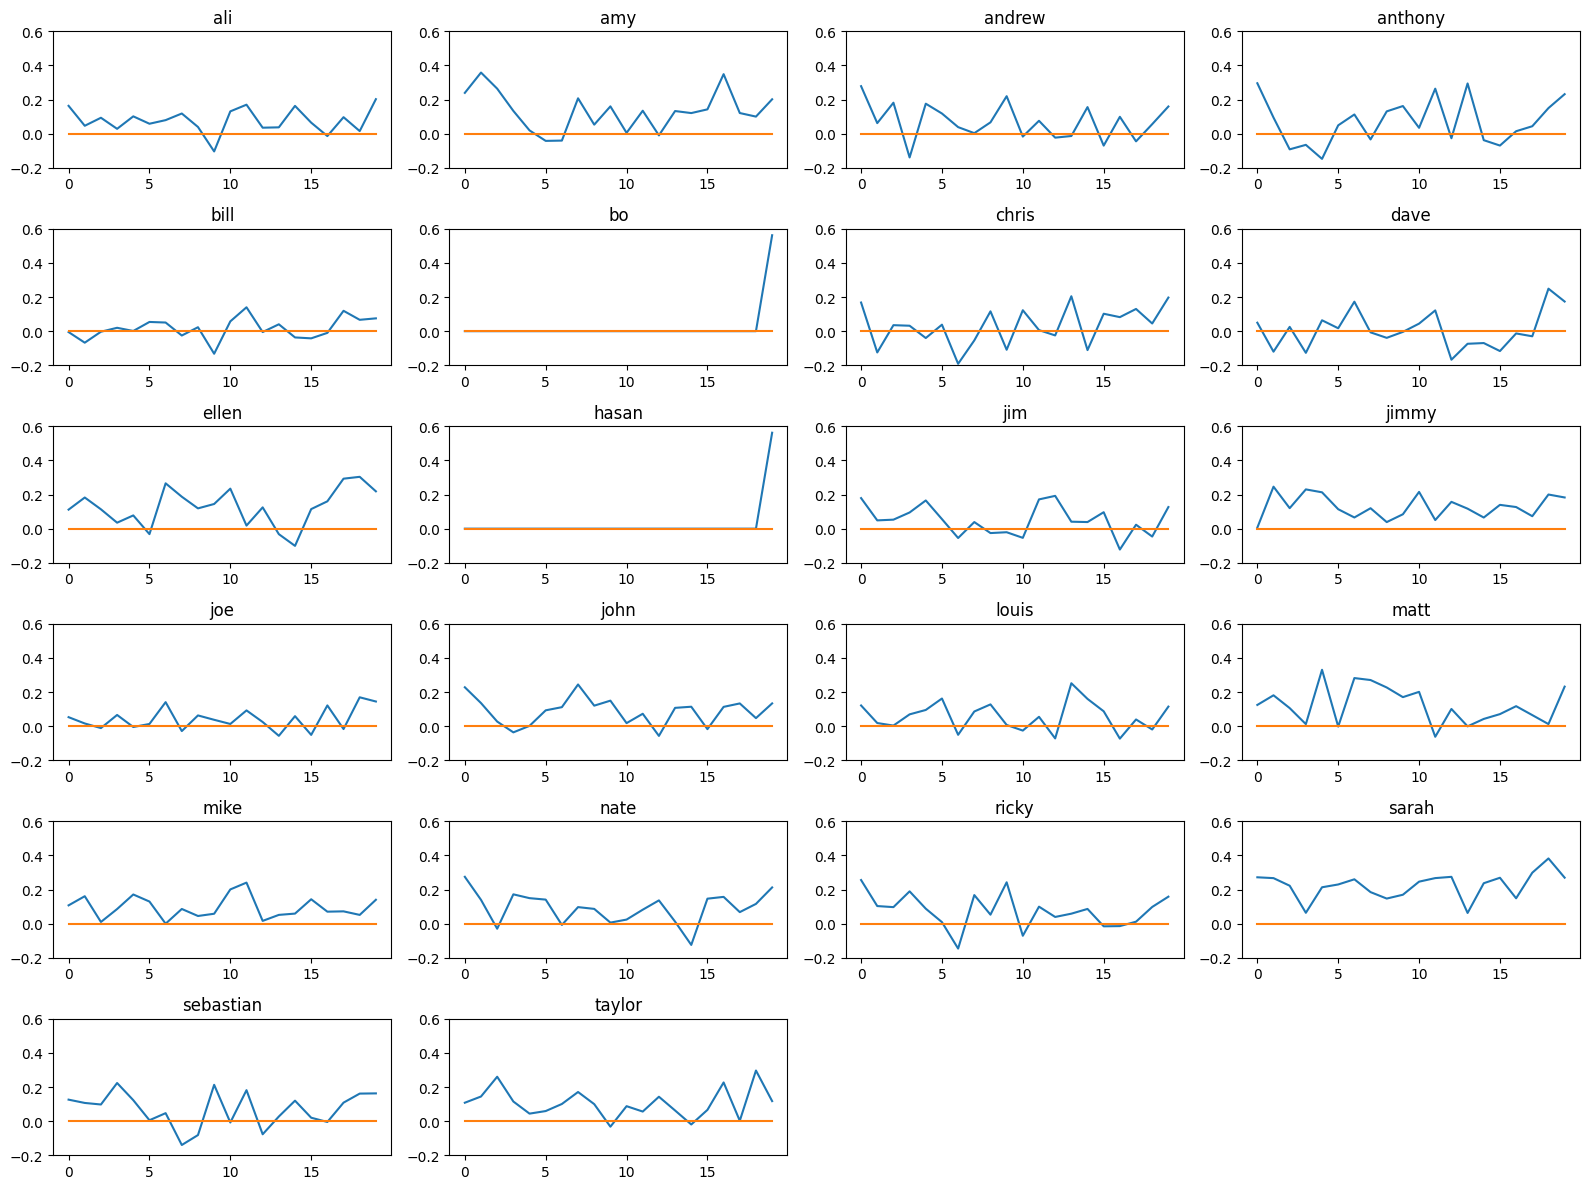

In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

# Define the number of sections
num_sections = 20  

# Recalculate polarity transcript based on words
polarity_transcript = []
for transcript in data['transcript']:
    # Split the transcript into a list of words
    words = transcript.split()
    total_words = len(words)
    section_length = total_words // num_sections  # Number of words per section
    polarities = []
    
    # Handle case where transcript is too short
    if section_length == 0:
        polarities = [TextBlob(transcript).sentiment.polarity] * num_sections  # Repeat single polarity
    else:
        for i in range(num_sections):
            start = i * section_length
            # Ensure the last section includes remaining words
            end = start + section_length if i < num_sections - 1 else total_words
            section_words = words[start:end]
            section_text = " ".join(section_words)  # Rejoin words into a string
            polarities.append(TextBlob(section_text).sentiment.polarity)
    
    polarity_transcript.append(polarities)

# Determine the number of rows and columns for subplots
num_comedians = len(data.index)
cols = 4  # Fixed number of columns
rows = math.ceil(num_comedians / cols)

# Plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(rows, cols, index + 1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, num_sections), np.zeros(num_sections))
    plt.title(comedian)
    plt.ylim(ymin=-0.2, ymax=0.6)

plt.tight_layout()
plt.show()